In [1]:
import text2emotion as te
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")

In [22]:
def getConversations(s,e):
    train = pd.read_csv("train.csv")
    train = train.iloc[:, :7].dropna()
    selfeval = train['selfeval']
    train["empathy"] = selfeval.str.extract('\d\|\d\|\d_(\d)\|\d\|\d')
    train = train.dropna()
    conversations = train["conv_id"].value_counts()
    lsconv = []
    i = 0
    for ids in conversations.index:
        convo = train.loc[train["conv_id"] == ids]
        convo = convo.drop(columns=["utterance_idx", "selfeval", "conv_id"])
        if len(convo["speaker_idx"].unique()) !=2:
            continue
        s1id = convo["speaker_idx"].unique()[0]
        s2id = convo["speaker_idx"].unique()[1]
        s1 = convo.loc[convo["speaker_idx"] == s1id]
        s2 = convo.loc[convo["speaker_idx"] == s2id]
        s1words = [s.replace("_comma_", ",") for s in s1["utterance"].values.tolist()]
        s2words = [s.replace("_comma_", ",") for s in s2["utterance"].values.tolist()]
        context = convo["context"].str.extract('(\w+)').values[0].item()
        escore = int(convo["empathy"].values[0])
        prompt = [convo["prompt"].unique()[0]]
        lsconv.append([context, prompt + s1words, s2words, escore])
        
        if i % 100 == 0:
            print(i)
        i +=1
    return lsconv

def getLabels():
    train = pd.read_csv("train.csv")
    train = train.iloc[:, :7].dropna()
    selfeval = train['selfeval']
    train["empathy"] = selfeval.str.extract('\d\|\d\|\d_(\d)\|\d\|\d')
    train = train.dropna()
    conversations = train["conv_id"].value_counts()
    print(len(convsersations))
    labels = []
    i = 0
    for ids in conversations.index:
        convo = train.loc[train["conv_id"] == ids]
        convo = convo.drop(columns=["utterance_idx", "selfeval", "conv_id"])
        if len(convo["speaker_idx"].unique()) !=2:
            continue
        escore = int(convo["empathy"].values[0])
        labels.append(escore)
        
        if i % 1000 == 0:
            print(i)
        i +=1
    return labels

def empathy(prompt, response):
    # Gets just the emotion values for each statement.
    promptEmotions = list(te.get_emotion(prompt).values())
    responseEmotions = list(te.get_emotion(response).values())
    # Calculates the distance between the emotion vectors.
    return promptEmotions+ responseEmotions
          
def testing(s,e):
    conversations = getConversations(s,e)
    person1 = " ".join(conversations[0][1])
    person2 = " ".join(conversations[0][2])
    values = np.array(empathy(person1, person2))
    values = np.reshape(values, (1,10))
    for i in range(1, len( conversations)):
        person1 = " ".join(conversations[i][1])
        person2 = " ".join(conversations[i][2])
        temp = np.array(empathy(person1, person2))
        temp = np.reshape(temp, (1,10))
        values = np.append(values, temp, axis = 0)
    return values

In [35]:
np.save("first 100.npy", v)

X is a 18,108 by 10 (where the 10 is the five emotion values for speaker1 and the five emotion values for speaker2)
Y is a 18,108 by 1 (where this is just the empathy score that is in the dataset)


In [10]:
labelstest = getLabels()

c:\users\parke\onedrive\documents\github\citrusenv\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (1,4,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000


In [59]:
labels = np.array(labels)
print(len(labels))
print(np.unique(labels))
print(w)
l7000 = labels[:6994]
np.unique(l7000)

18169
[0 1 2 3 4 5 6]
(array([ 2683,  6127,  9401, 11523, 12461, 12845, 15090, 17656, 17890],
      dtype=int64),)


array([0, 1, 2, 3, 4, 5, 6])

In [60]:
np.histogram(l7000, bins=[1, 2, 3, 4 ,5])

(array([  60,   73,  290, 6568], dtype=int64), array([1, 2, 3, 4, 5]))

In [32]:
n000 = np.load("0000s.npy")
n1000 = np.load("first 1001.npy")
n2000 = np.load("2000s.npy")
n3000 = np.load("3000s.npy")
n4000 = np.load("first 4001.npy")
n5000 = np.load("5000s.npy")
n6000 = np.load("6000s.npy")
alls = np.concatenate((n000, n1000, n2000, n3000, n4000 , n5000 , n6000))
alls.shape

(6994, 10)

0.7638650657518582


<AxesSubplot:>

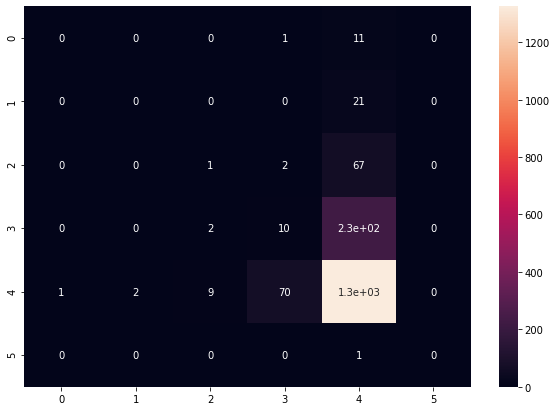

In [51]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
# X -> features, y -> label
X = alls
y = l7000
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

0.8033161806746713


<AxesSubplot:>

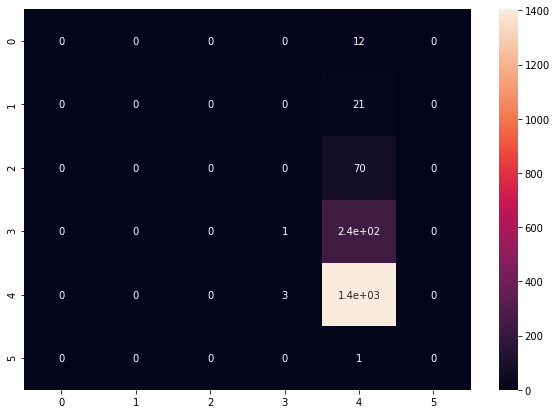

In [57]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
# loading the iris dataset
  
# X -> features, y -> label
X = alls
y = l7000
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
accuracy = dtree_model.score(X_test, y_test)
print(accuracy ) 
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

0.7884505431675243


<AxesSubplot:>

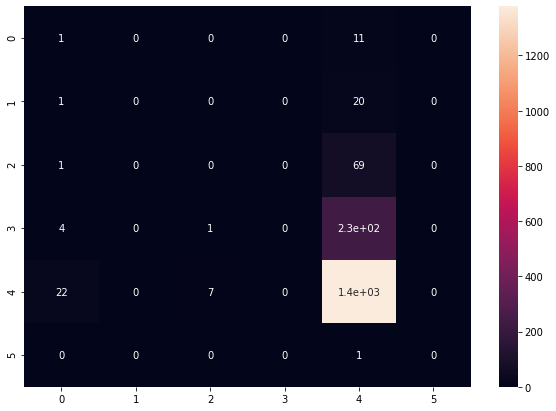

In [56]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

  
# X -> features, y -> label
X = alls
y = l7000
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

In [31]:
y.shape

(150,)